In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.columns=df.columns.str.strip()
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [6]:
educated=df.education.value_counts().values
educated
columns=df.education.value_counts().index
columns

Index([' Graduate', ' Not Graduate'], dtype='object', name='education')

In [7]:
loan_term_info=df.loan_term.value_counts()
loan_term_info

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

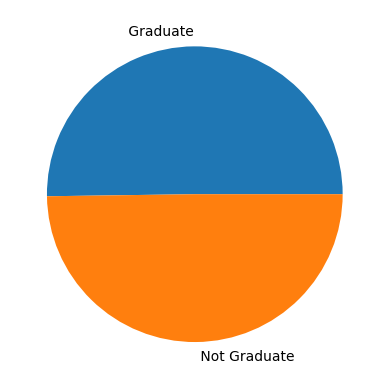

In [6]:
plt.pie(educated,labels=columns)
plt.show()

In [7]:
self_employ_data=df.self_employed.value_counts().values
self_employ_data_index=df.self_employed.value_counts().index

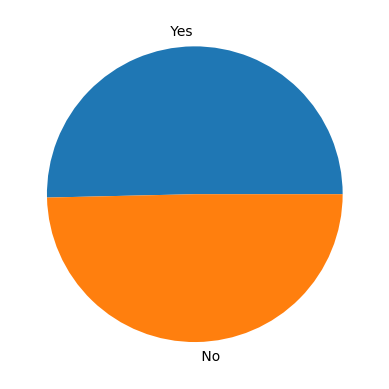

In [8]:
plt.pie(self_employ_data,labels=self_employ_data_index)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Encode 'education' column
df['education'] = le.fit_transform(df['education'])  # Graduate → 1, Not Graduate → 0

# Encode 'self_employed' column
df['self_employed'] = le.fit_transform(df['self_employed'])  # No → 0, Yes → 1

# Encode target column 'loan_status'
df['loan_status'] = le.fit_transform(df['loan_status'])  

In [10]:
X=df.iloc[:,1:-1]
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [11]:
Y=df.iloc[:,-1]
Y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int32

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=43)
len(X_train)

3415

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model=RandomForestClassifier()

In [15]:
params={
    'n_estimators':[10,100,50,150,200],
    'criterion':['gini','entropy','log_loss'],
    'oob_score': [True] ,# ✅ in a list, since you're passing it to GridSearchCV
    'max_depth':[10,20,5,30],
    'min_samples_split':[3,4,6,7,8,10,11] 
}

In [16]:
final_model=GridSearchCV(model,params,cv=5,scoring='accuracy')

In [17]:
final_model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 5, 30],
                         'min_samples_split': [3, 4, 6, 7, 8, 10, 11],
                         'n_estimators': [10, 100, 50, 150, 200],
                         'oob_score': [True]},
             scoring='accuracy')

In [18]:
prediction=final_model.predict(X_test)

In [19]:
print("Score is :", final_model.best_estimator_.oob_score_)
print("Error is :", 1 - final_model.best_estimator_.oob_score_)


Score is : 0.9783308931185944
Error is : 0.021669106881405553


In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy score for testing data", accuracy_score(prediction,Y_test))

In [ ]:
train_predicted=final_model.predict(X_train)
print("accuracy score for testing data", accuracy_score(train_predicted,Y_train))